# Load two images

In [2]:
!wget http://fmb.images.gan4x4.ru/miem/3d/girl.png
!wget http://fmb.images.gan4x4.ru/miem/3d/t-pose.png

--2023-09-20 05:56:45--  http://fmb.images.gan4x4.ru/miem/3d/girl.png
Resolving fmb.images.gan4x4.ru (fmb.images.gan4x4.ru)... 212.24.105.216
Connecting to fmb.images.gan4x4.ru (fmb.images.gan4x4.ru)|212.24.105.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263032 (257K) [image/png]
Saving to: ‘girl.png’

girl.png            100%[===================>] 256.87K   262KB/s    in 1.0s    

2023-09-20 05:56:47 (262 KB/s) - ‘girl.png’ saved [263032/263032]

--2023-09-20 05:56:47--  http://fmb.images.gan4x4.ru/miem/3d/t-pose.png
Resolving fmb.images.gan4x4.ru (fmb.images.gan4x4.ru)... 212.24.105.216
Connecting to fmb.images.gan4x4.ru (fmb.images.gan4x4.ru)|212.24.105.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60254 (59K) [image/png]
Saving to: ‘t-pose.png’

t-pose.png          100%[===================>]  58.84K   163KB/s    in 0.4s    

2023-09-20 05:56:47 (163 KB/s) - ‘t-pose.png’ saved [60254/60254]



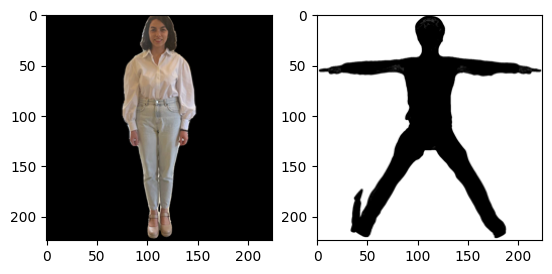

In [3]:
import matplotlib.pyplot as plt
from PIL import Image


girl = Image.open("girl.png").resize((224,224))
t_pose = Image.open("t-pose.png").resize((224,224))
#girl = girl.resize((224,224))
#t_pose = t_pose.resize((224,224))

plt.subplot(1, 2, 1)
plt.imshow(girl)
plt.subplot(1, 2, 2)
plt.imshow(t_pose)
plt.show()


# Manually define some keypoints

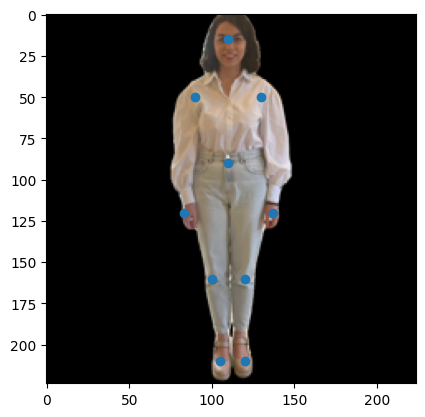

In [6]:
a_points = [[110,15] , # head
            [90,50] , [130,50], # shoulders
            [83,120] , [137,120], # hands
            [110,90], # belly
            [100,160] , [120,160], # knee
            [105,210] ,[120,210]] # foots
plt.imshow(girl)
x,y = list(zip(*a_points))
plt.scatter(x,y)
plt.show()

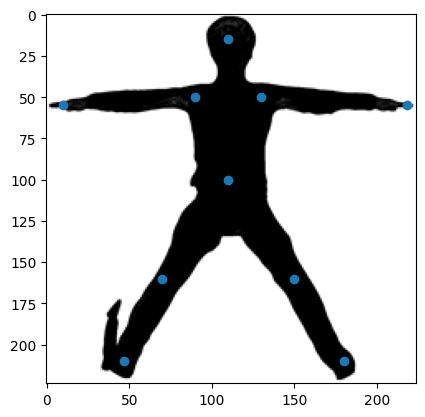

In [7]:
b_points = [
    [110,15] , # head
    [90,50] , [130,50], # shoulders
    [10,55] , [218,55], # hands
    [110,100], # belly
    [70,160] , [150,160], # knee
    [47,210],[180, 210] # foots
    ]
plt.imshow(t_pose)
x,y = list(zip(*b_points))
plt.scatter(x,y)
plt.show()

# Apply different transforms

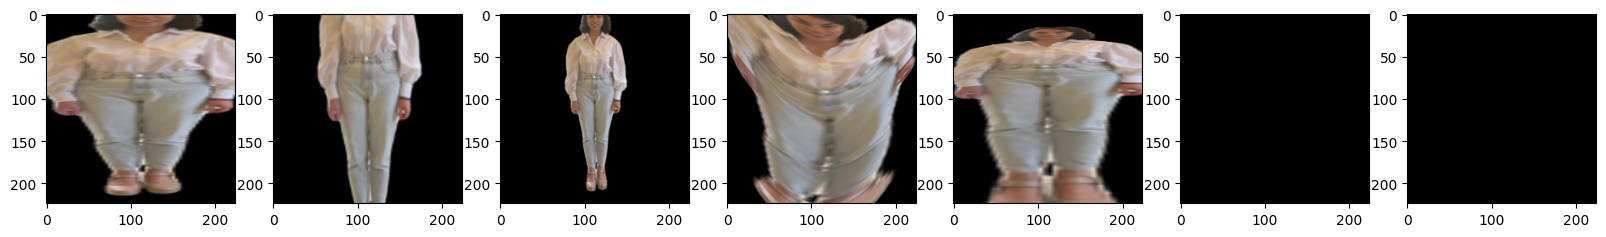

In [10]:
from skimage.transform import *
import numpy as np

plt.figure(figsize=(20,10))

transform_list = [AffineTransform,
                  SimilarityTransform,
                  EuclideanTransform ,
                  PolynomialTransform,
                  ProjectiveTransform,
                  EssentialMatrixTransform,
                  FundamentalMatrixTransform
                  ]


for i, t in enumerate(transform_list):

  plt.subplot(1, len(transform_list), i+1)
  inst = t()
  inst.estimate( np.array(b_points),  np.array(a_points) )
  wrapped = warp(np.array(girl), inst , clip=False)
  plt.imshow(wrapped)

plt.show()